In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix

In [11]:
# 1. Download data for creating DataFrame

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [12]:
# 2. Receiving basic statistic characteristics
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


<ipython-input-13-dffd3cea5303>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette='viridis')


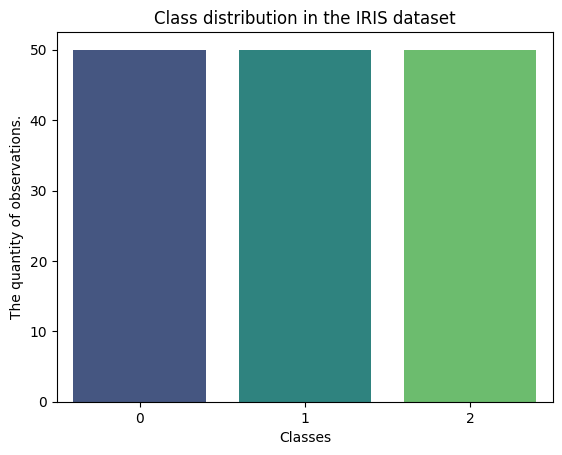

In [13]:
#3. Visualization of class distribution

sns.countplot(x=df['target'], palette='viridis')
plt.xlabel('Classes')
plt.ylabel('The quantity of observations.')
plt.title('Class distribution in the IRIS dataset')
plt.show()

In [14]:
# 4. Data standartdization.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris.data)

In [17]:
# 5. Performing spectral clustering

spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
predicted_clusters = spectral.fit_predict(X_scaled)

In [18]:
# 6. Comparison of predicted clusters and actual classes

conf_matrix = confusion_matrix(iris.target, predicted_clusters)
print("Confusion matrix:\n", conf_matrix)

Confusion matrix:
 [[ 0 49  1]
 [ 3  0 47]
 [32  0 18]]


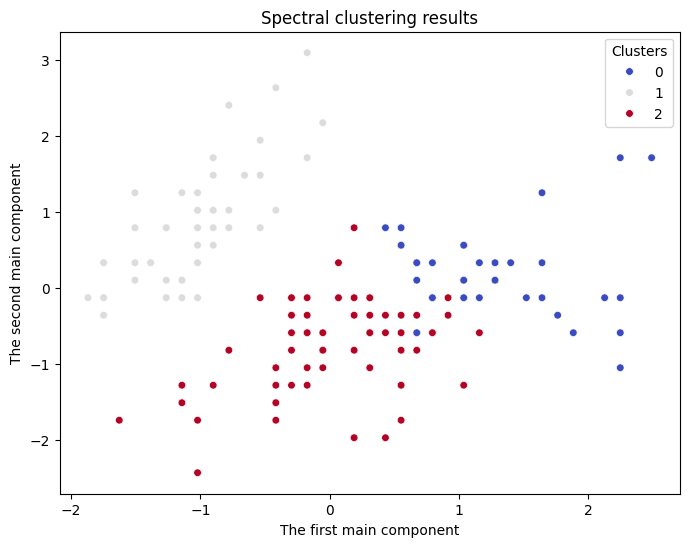

In [20]:
# 7. Visualization of clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=predicted_clusters, palette = 'coolwarm', s=30)
plt.xlabel('The first main component')
plt.ylabel('The second main component')
plt.title('Spectral clustering results')
plt.legend(title='Clusters')
plt.show()


__General Conclusions:__

* Class distribution – All three classes have an equal number of observations.

* Standardization – Brought the data to the same scale, improving clustering performance.

* Spectral clustering – Successfully separated the data, although there may be slight errors.

* Confusion matrix – Shows how well the obtained clusters correspond to the actual classes.

* Clustering plot – Helps visualize the grouping of the data.